### sentiment-analysis-ev-vehicle-india

This is a general review analysis with repect to EV Vehicle Market in India, without indepth car model wise analysis just to get glimpse of Indian Customers.

In [1]:
!pip install pandas numpy matplotlib seaborn --quiet

In [2]:
!pip install nltk TextBlob wordcloud --quiet

### Import Package & Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df1 = pd.read_csv('cartrade-ev-vehicle.csv')

In [5]:
df2 = pd.read_csv('cardekho-ev-vehicle.csv')

In [6]:
df3 = pd.read_csv('carwale-ev-vehicle.csv')

In [7]:
df1.head(2)

,user_name,car,type,ratings,exterior,interior,ride_quality,mileage,time_of_review,review
0,Kartik,tata tiago ev,ev,5,5,5,5,150 per month,3 months ago,tiago ev more than a car tiago ev is the right...
1,Ganesh Kailas Patil,tata tiago ev,ev,5,5,5,5,2000 per month,11 months ago,nice car buying tata tiago is very best drivin...


In [8]:
df2.head(2)

,Review,Rating,Attributes Mentioned,Model
0,Using it for the last 1 month. It's a gentle-l...,5.0,['mileage' 'performance' 'power' 'price' 'seat...,hyundai kona
1,"In the beginning, the car performed excellentl...",1.0,['mileage' 'performance' 'service' 'parts'],hyundai kona


In [9]:
df3.head(2)

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona


In [10]:
df1.rename(columns = {'ratings': 'rating'}, inplace = True)

In [11]:
df1.head(1)

,user_name,car,type,rating,exterior,interior,ride_quality,mileage,time_of_review,review
0,Kartik,tata tiago ev,ev,5,5,5,5,150 per month,3 months ago,tiago ev more than a car tiago ev is the right...


In [12]:
df2.rename(columns = {'Review': 'review'}, inplace = True)

In [13]:
df2.rename(columns = {'Rating': 'rating'}, inplace = True)

In [14]:
df2.head(1)

,review,rating,Attributes Mentioned,Model
0,Using it for the last 1 month. It's a gentle-l...,5.0,['mileage' 'performance' 'power' 'price' 'seat...,hyundai kona


In [15]:
df = pd.concat([df1, df2, df3], axis = 0)

In [16]:
data = df.loc[:, ['rating','review']]

In [17]:
data.isna().sum()

rating    0
review    0
dtype: int64

In [18]:
data.head(5)

,rating,review
0,5.0,tiago ev more than a car tiago ev is the right...
1,5.0,nice car buying tata tiago is very best drivin...
2,4.0,safe and best to go car interior is a bit comp...
3,5.0,i m loving it its a amazing experience with ta...
4,5.0,excellent ev excellent ev hatchback for family...


In [19]:
data.shape

(300, 2)

### Data Cleaning

In [20]:
# Stop words Removal
import nltk
from nltk.corpus import stopwords

In [21]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Sagar
[nltk_data]     Rajput\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sagar
[nltk_data]     Rajput\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{'they', 'both', 'against', 'whom', 'your', 'only', 'if', 'herself', 'which', "she's", 'same', 'an', 'off', 'but', 'by', 'into', 'more', 'ain', "it's", 'because', 'once', 'or', 'ma', 'few', 'down', "don't", "weren't", 'so', 'from', 'our', 'the', 'while', 'my', 'doesn', 'than', 'do', 'any', 'we', 'about', 'of', 'then', 'between', 'have', 'are', "you've", 'theirs', 'out', 'below', 'most', 'd', 're', "mightn't", 'what', 'just', 'haven', 'does', 'had', 've', 'he', "isn't", 'where', 'themselves', "wouldn't", 'myself', 'i', 'her', 'yourself', 'this', 'until', 'will', "shouldn't", 'there', 'further', "mustn't", "shan't", "didn't", 'now', 'ours', 'being', 'should', 'mightn', 'here', 'as', 'who', 'after', 'ourselves', 'shan', 'again', 'hers', 'too', 'how', "that'll", 'it', 'under', 'am', 'their', 'weren', 'when', 'to', 'its', 'each', 'hadn', 'did', 's', "aren't", 'you', 'been', 'those', 'nor', 'some', 'y', 'has', 'for', "needn't", 'o', 'didn', 'yourselves', "couldn't", 'other', 'won', 'such', '

In [23]:
len(nltk_stopwords)

179

In [24]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'thereafter', 'beyond', 'except', 'your', 'only', 'fifteen', 'herself', 'front', 'which', 'herein', 'off', 'across', 'two', 'by', 'into', 'because', 'became', 'without', 'latterly', 'so', 'hereafter', 'the', 'anyone', 'whenever', 'along', 'while', 'four', 'system', 'show', 'about', 'part', 'of', 'then', 'are', 'first', 'most', 'un', 'neither', 'what', 'bill', 'due', 'he', 'her', 'rather', 'this', 'alone', 'besides', 'until', 'will', 'further', 'con', 'sometimes', 'anyway', 'ten', 'wherein', 'now', 'ours', 'as', 'thick', 'after', 'many', 'ourselves', 'whither', 'hers', 'how', 'almost', 'becoming', 'noone', 'beside', 'ie', 'someone', 'becomes', 'its', 'otherwise', 'whereas', 'seeming', 'nor', 'been', 'us', 'has', 'eg', 'seemed', 'upon', 'third', 'forty', 'that', 'always', 'see', 'empty', 'cry', 'etc', 'these', 'full', 'describe', 'ltd', 'anywhere', 'during', 'become', 'him', 'therefore', 'name', 'and', 'per', 'fire', 'twenty', 'sixty', 'own', 'them', 'hence', 'thus', 'yours', 'get', 'se

In [25]:
len(sklearn_stopwords)

318

In [26]:
# Find the common stopwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'they', 'both', 'against', 'whom', 'your', 'only', 'if', 'herself', 'which', 'same', 'an', 'off', 'but', 'by', 'into', 'more', 'because', 'once', 'or', 'few', 'down', 'so', 'from', 'our', 'the', 'while', 'my', 'than', 'do', 'any', 'we', 'about', 'of', 'then', 'between', 'have', 'are', 'out', 'most', 'below', 're', 'what', 'had', 'he', 'where', 'themselves', 'myself', 'i', 'her', 'yourself', 'this', 'until', 'will', 'there', 'further', 'now', 'ours', 'being', 'should', 'here', 'as', 'who', 'after', 'ourselves', 'again', 'hers', 'too', 'how', 'it', 'under', 'am', 'their', 'when', 'to', 'its', 'each', 'you', 'been', 'those', 'nor', 'some', 'has', 'for', 'yourselves', 'other', 'such', 'me', 'that', 'is', 'at', 'these', 'not', 'up', 'be', 'during', 'him', 'she', 'on', 'over', 'and', 'own', 'them', 'yours', 'a', 'why', 'all', 'himself', 'through', 'were', 'above', 'no', 'his', 'can', 'in', 'before', 'very', 'with', 'itself', 'was'}


In [27]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [28]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [29]:
len(combined_stopwords)

378

In [30]:
domain_stopwords = ['car', 'ev', 'car.', 'driving', 'km', 'drive']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [31]:
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [32]:
#create an empty list to collect cleaned data corpus
cleaned_review =[]

In [33]:
#loop through each review, remove punctuations, lower case it, join it and add it to corpus
for rev in data.review:
    rev = rev.lower()
    rev = rev.split()
    rev = [lemmatizer.lemmatize(word) for word in rev if word not in final_stopwords]
    rev = " ".join(rev)
    cleaned_review.append(rev)
    

In [34]:
# add the corpus to the original dataframe
data['cleaned_review'] = cleaned_review

In [35]:
data.head(5)

,rating,review,cleaned_review
0,5.0,tiago ev more than a car tiago ev is the right...,tiago tiago right city high power loaded featu...
1,5.0,nice car buying tata tiago is very best drivin...,nice buying tata tiago best nice look goodserv...
2,4.0,safe and best to go car interior is a bit comp...,safe best interior bit compact comfortable ext...
3,5.0,i m loving it its a amazing experience with ta...,loving amazing experience tata tiago good buil...
4,5.0,excellent ev excellent ev hatchback for family...,excellent excellent hatchback family low cost ...


Let us see now polarity and sentiment of the cleaned review.

In [36]:
from textblob import TextBlob

In [37]:
def polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
        
def sentiment(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'

In [38]:
data['polarity'] = data['cleaned_review'].apply(polarity)

In [39]:
data['sentiment'] = data['polarity'].apply(sentiment)

In [40]:
data.head(5)

,rating,review,cleaned_review,polarity,sentiment
0,5.0,tiago ev more than a car tiago ev is the right...,tiago tiago right city high power loaded featu...,0.222857,Positive
1,5.0,nice car buying tata tiago is very best drivin...,nice buying tata tiago best nice look goodserv...,0.550000,Positive
2,4.0,safe and best to go car interior is a bit comp...,safe best interior bit compact comfortable ext...,0.557993,Positive
3,5.0,i m loving it its a amazing experience with ta...,loving amazing experience tata tiago good buil...,0.625000,Positive
4,5.0,excellent ev excellent ev hatchback for family...,excellent excellent hatchback family low cost ...,0.397222,Positive


The above result is obtained after cleaning the review data with new addition of polarity and sentiment.

### Data Visualization

In [41]:
per_rating = df.rating.value_counts()

<AxesSubplot:xlabel='rating', ylabel='count'>

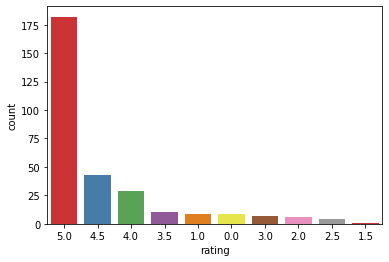

In [42]:
sns.countplot(x = 'rating', data = data, order = per_rating.index, palette = 'Set1')

Most of the ratings is good.

#### Words used to express in reviews

In [43]:
from wordcloud import WordCloud

In [55]:
#reviews = " ".join(data.cleaned_review)
#plt.figure(figsize=(20,10))

# Create and generate a word cloud image:
#wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=100, background_color='white').generate(reviews)

# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

['tiago', 'tiago', 'right', 'city', 'high', 'power', 'loaded', 'feature', 'like', 'auto', 'head', 'lamprain', 'sensing', 'wiper', 'range', 'issue', 'u', 'max', 'u', 'wont', 'like', 'petrol', 'diesel', 'vehicle', 'category', 'running', 'cost', 'r', 'nice', 'buying', 'tata', 'tiago', 'best', 'nice', 'look', 'goodservices', 'maintenance', 'low', 'safe', 'best', 'interior', 'bit', 'compact', 'comfortable', 'exterior', 'fine', 'sufficient', 'space', 'long', 'trip']


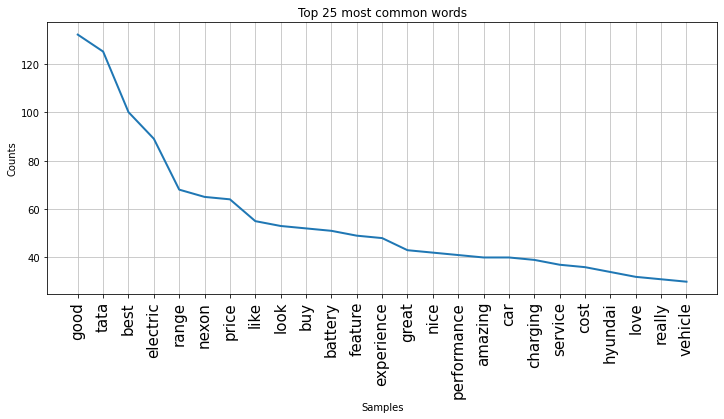

In [49]:
# Write the code for plotting the cleaned review
all_words = []
for t in data["cleaned_review"]:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

The frequency chart above shows that the key words within the reviews include good, tata, best, electric, etc shows that people are actively expressing sentiment related to ev price and ev service time using these words.

### Sentiment of Customers

In [50]:
data["sentiment"].value_counts(normalize=True)*100

Positive    91.666667
Negative     6.000000
Neutral      2.333333
Name: sentiment, dtype: float64

<Figure size 1080x1080 with 0 Axes>

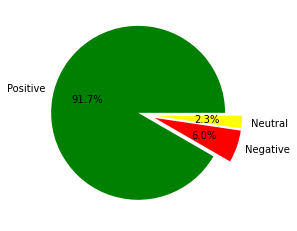

In [51]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = data["sentiment"].value_counts(normalize=True) * 100

# create the pie chart
plt.figure(figsize=(15,15))
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index, 
    colors=['green', 'red', 'yellow'], 
    explode=[0.1, 0.1, 0.1], 
    autopct='%1.1f%%'
    )

plt.show()

In the above pie diagram, we can see 91.7 % positive sentiment, 6.0 % negative sentiment and the remaining 2.3 % is neutral sentiment.

